In [25]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
from google.colab import drive
# drive.mount('/content/drive',force_remount=True)
df= pd.read_csv('/content/result (3).csv')
# df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MAJOR_PROJECT/DATASET/result.xlsx')
df.head(5)

,Unnamed: 0,Content,label,label_count,SCANNED_BODYPARTS,OBSERVATIONS,ORGAN_STATUS,number label
0,0.0,"Contrast enhanced scan of the thorax, abdomen ...",choriocarcinoma,0.0,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...","['case of choriocarcinoma', 'no significant me...",['Two enhancing lesions nodules are seen in th...,1.0
1,1.0,"Contrast enhanced CT scan of the thorax, abdo...",choriocarcinoma,0.0,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...","['case of choriocarcinoma, post TAH and RSO, p...",['Multiple (>20) bilateral lung metastases pre...,2.0
2,2.0,Plain and contrast enhanced scan of the brain...,choriocarcinoma,0.0,['brain'],"['case of choriocarcinoma, post TAH and RSO, p...",['cerebral hemispheres appear normal with no o...,3.0
3,3.0,"Contrast enhanced CT scan of the thorax, abdom...",choriocarcinoma,0.0,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...","['case of choriocarcinoma, post TAH and RSO, p...",['significant decrease in the size and number ...,4.0
4,4.0,"Contrast enhanced CT scan of the thorax, abdo...",choriocarcinoma,0.0,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...",['case of Choriocarcinoma of left ovary u/w Ex...,['A tiny subpleural nodule is seen in the apic...,5.0


In [27]:

df = df.reset_index(drop=True)
df = df.sample(frac = 1)
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,Content,label,label_count,SCANNED_BODYPARTS,OBSERVATIONS,ORGAN_STATUS,number label
214,Contrast enhanced scan of the abdomen and pel...,Stromal,5.0,"['abdomen', 'pelvis']","['case of Right Ovary Granulosa cell tumor, Un...",['liver is normal in size & shape and shows no...,26.0
108,"Contrast enhanced scan of the thorax, abdomen...",muscinous adenocarcinoma,3.0,"['thorax', 'abdomen', 'pelvis', 'Abdomen', 'pe...","['case of low grade mucinous adenocarcinoma, p...",['right ovary is bulky with a solid cystic app...,1.0
255,Contrast enhanced CT scan of the abdomen and ...,Teratoma,6.0,"['abdomen', 'pelvis']","['case of Ca Ovary', 'TUMOUR MARKERS: Serum CA...",['A heterogenously enhancing mass measuring 7....,27.0
204,Contrast enhanced scan has been performed fro...,Stromal,5.0,['domes of diaphragm upto the ischial tuberosi...,"['-Case of endometrial stromal sarcoma, post T...","['uterus is not seen-post op status.', 'Liver ...",16.0
92,"Contrast enhanced CT scan of the thorax, abdo...",embryonal,2.0,"['abdomen', 'pelvis', 'THORAX', 'ABDOMEN', 'PE...",['case of Immature teratoma of ovary underwent...,['Right ovary is not seen separately from the ...,17.0
...,...,...,...,...,...,...,...
119,"Contrast enhanced CT scan of the thorax, abdo...",muscinous adenocarcinoma,3.0,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...",['case of abdominopelvic mass under evaluation...,"['lungs and pleural spaces are clear.', 'Trach...",12.0
135,"Contrast enhanced CT scan of the thorax, abdo...",muscinous adenocarcinoma,3.0,"['abdomen', 'pelvis']",['case of High grade serous adenocarcinoma of ...,['right ovary is bulky with a solid cystic app...,28.0
219,Contrast enhanced CT has been performed for t...,Stromal,5.0,"['thorax', 'abdomen', 'pelvis']","['case of GCT (sex cord tumor) of right ovary,...","['urinary bladder is normal.', 'uterus appears...",31.0
282,"Contrast enhanced CT scan of the thorax, abdo...",yolk sac,7.0,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...",['case of Recurrent Germ cell tumor post chemo...,['Bilateral gross pleural effusion noted with ...,16.0


In [28]:
df= df.dropna(thresh=2)

In [29]:
df

,Content,label,label_count,SCANNED_BODYPARTS,OBSERVATIONS,ORGAN_STATUS,number label
214,Contrast enhanced scan of the abdomen and pel...,Stromal,5.0,"['abdomen', 'pelvis']","['case of Right Ovary Granulosa cell tumor, Un...",['liver is normal in size & shape and shows no...,26.0
108,"Contrast enhanced scan of the thorax, abdomen...",muscinous adenocarcinoma,3.0,"['thorax', 'abdomen', 'pelvis', 'Abdomen', 'pe...","['case of low grade mucinous adenocarcinoma, p...",['right ovary is bulky with a solid cystic app...,1.0
255,Contrast enhanced CT scan of the abdomen and ...,Teratoma,6.0,"['abdomen', 'pelvis']","['case of Ca Ovary', 'TUMOUR MARKERS: Serum CA...",['A heterogenously enhancing mass measuring 7....,27.0
204,Contrast enhanced scan has been performed fro...,Stromal,5.0,['domes of diaphragm upto the ischial tuberosi...,"['-Case of endometrial stromal sarcoma, post T...","['uterus is not seen-post op status.', 'Liver ...",16.0
92,"Contrast enhanced CT scan of the thorax, abdo...",embryonal,2.0,"['abdomen', 'pelvis', 'THORAX', 'ABDOMEN', 'PE...",['case of Immature teratoma of ovary underwent...,['Right ovary is not seen separately from the ...,17.0
...,...,...,...,...,...,...,...
119,"Contrast enhanced CT scan of the thorax, abdo...",muscinous adenocarcinoma,3.0,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...",['case of abdominopelvic mass under evaluation...,"['lungs and pleural spaces are clear.', 'Trach...",12.0
135,"Contrast enhanced CT scan of the thorax, abdo...",muscinous adenocarcinoma,3.0,"['abdomen', 'pelvis']",['case of High grade serous adenocarcinoma of ...,['right ovary is bulky with a solid cystic app...,28.0
219,Contrast enhanced CT has been performed for t...,Stromal,5.0,"['thorax', 'abdomen', 'pelvis']","['case of GCT (sex cord tumor) of right ovary,...","['urinary bladder is normal.', 'uterus appears...",31.0
282,"Contrast enhanced CT scan of the thorax, abdo...",yolk sac,7.0,"['thorax', 'abdomen', 'pelvis', 'THORAX', 'ABD...",['case of Recurrent Germ cell tumor post chemo...,['Bilateral gross pleural effusion noted with ...,16.0


In [30]:
df['label_count'].value_counts()

7.0    46
4.0    42
5.0    39
3.0    37
6.0    37
0.0    37
1.0    37
2.0    31
Name: label_count, dtype: int64

In [31]:
# Combining Three column
text_columns = ['SCANNED_BODYPARTS', 'OBSERVATIONS', 'ORGAN_STATUS']
df['combined_text'] = df[text_columns].apply(lambda row: ' '.join(row), axis=1)

<ipython-input-31-7872b7f0db0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_text'] = df[text_columns].apply(lambda row: ' '.join(row), axis=1)


In [32]:
# Preprocessing
import string
def process_text(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        text = str(text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))


    # Convert numeric values to strings
    tokens = [str(word) if not isinstance(word, str) else word for word in tokens]

    # Remove stop words
    tokens = [word for word in tokens if word.lower() not in stop_words]


    # Stemming (using Porter Stemmer)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

In [33]:
# APPLY PREPROCESSING
df['combined_text'] = df['combined_text'].apply(process_text)
df['combined_text'] = df['combined_text'].apply(remove_punctuation)

<ipython-input-33-14423f61f773>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_text'] = df['combined_text'].apply(process_text)
<ipython-input-33-14423f61f773>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_text'] = df['combined_text'].apply(remove_punctuation)


Epoch 1/10
16/16 [==============================] - 6s 201ms/step - loss: 2.0768 - accuracy: 0.1885 - val_loss: 2.0728 - val_accuracy: 0.2258
Epoch 2/10
16/16 [==============================] - 3s 176ms/step - loss: 2.0586 - accuracy: 0.2951 - val_loss: 2.0623 - val_accuracy: 0.2581
Epoch 3/10
16/16 [==============================] - 2s 149ms/step - loss: 2.0290 - accuracy: 0.2869 - val_loss: 2.0259 - val_accuracy: 0.2903
Epoch 4/10
16/16 [==============================] - 3s 200ms/step - loss: 1.9623 - accuracy: 0.3115 - val_loss: 2.0065 - val_accuracy: 0.2742
Epoch 5/10
16/16 [==============================] - 3s 201ms/step - loss: 1.9460 - accuracy: 0.2787 - val_loss: 1.9974 - val_accuracy: 0.2258
Epoch 6/10
16/16 [==============================] - 3s 154ms/step - loss: 1.9355 - accuracy: 0.3156 - val_loss: 2.0054 - val_accuracy: 0.2903
Epoch 7/10
16/16 [==============================] - 2s 128ms/step - loss: 1.9242 - accuracy: 0.3443 - val_loss: 1.9924 - val_accuracy: 0.2903
Epoch 

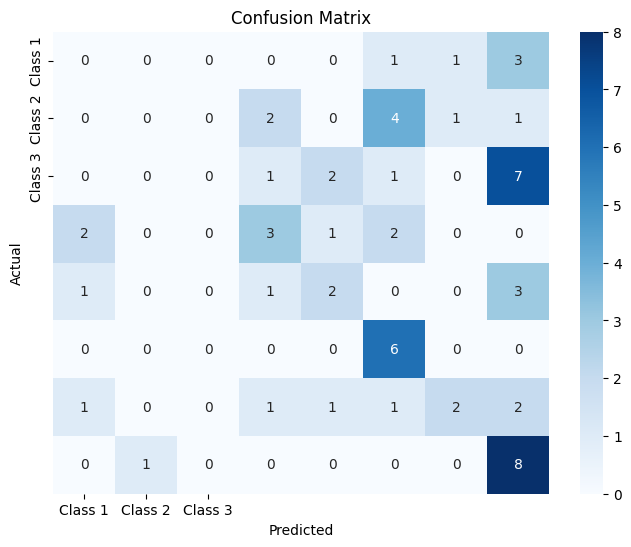

Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
         1.0       0.00      0.00      0.00         8
         2.0       1.00      0.00      0.00        11
         3.0       0.38      0.38      0.38         8
         4.0       0.33      0.29      0.31         7
         5.0       0.40      1.00      0.57         6
         6.0       0.50      0.25      0.33         8
         7.0       0.33      0.89      0.48         9

    accuracy                           0.34        62
   macro avg       0.37      0.35      0.26        62
weighted avg       0.42      0.34      0.25        62



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming 'status' is the column containing labels
# Assuming '0' is the label you want to skip

X_nonzero = df['combined_text']
y_nonzero = df['label_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_nonzero, y_nonzero, test_size=0.2, random_state=6)

# Tokenize and pad sequences
max_words = 5000  # Maximum number of words to keep in the vocabulary
max_len = 75  # Maximum length of sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len)

# Initialize an RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, activation='relu'))
model.add(Dense(8, activation='softmax'))  # Assuming 3 classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train, epochs=10, batch_size=16, validation_data=(X_test_padded, y_test))

# Predictions on the test set
y_pred_prob = model.predict(X_test_padded)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
